<br>

<b><font size=22>Automatic model selection methods</font></b>


**<font color = red>NGUYEN Thi Huong</font>**

**<font color = red>MASTER 2 EBDS</font>**

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from numpy.linalg import eig
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression

In [2]:
link = "https://raw.githubusercontent.com/lilyhuong/Auto-Selection-model/master/mtcars.csv"
df = pd.read_csv(link)
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df = df[["mpg", "disp", "drat", "wt", "qsec", "hp"]] 

In [4]:
df.describe()

,mpg,disp,drat,wt,qsec,hp
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,20.090625,230.721875,3.596563,3.217250,17.848750,146.687500
std,6.026948,123.938694,0.534679,0.978457,1.786943,68.562868
min,10.400000,71.100000,2.760000,1.513000,14.500000,52.000000
25%,15.425000,120.825000,3.080000,2.581250,16.892500,96.500000
50%,19.200000,196.300000,3.695000,3.325000,17.710000,123.000000
75%,22.800000,326.000000,3.920000,3.610000,18.900000,180.000000
max,33.900000,472.000000,4.930000,5.424000,22.900000,335.000000


In [5]:
df_scaler = StandardScaler().fit_transform(df)
df = pd.DataFrame(df_scaler, columns = df.columns)

In [6]:
X = df.iloc[:,0:5]
y = df[["hp"]]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0) 

# Correlation matrix

In [106]:
corr_matrix = X_train.corr()
print(corr_matrix)

           mpg      disp      drat        wt      qsec
mpg   1.000000 -0.846945  0.689050 -0.893044  0.475152
disp -0.846945  1.000000 -0.767664  0.878247 -0.442877
drat  0.689050 -0.767664  1.000000 -0.716093  0.201534
wt   -0.893044  0.878247 -0.716093  1.000000 -0.204669
qsec  0.475152 -0.442877  0.201534 -0.204669  1.000000


/var/folders/q2/tks8t2v53c95y3jqch98mqrc0000gn/T/ipykernel_16681/3703966331.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))


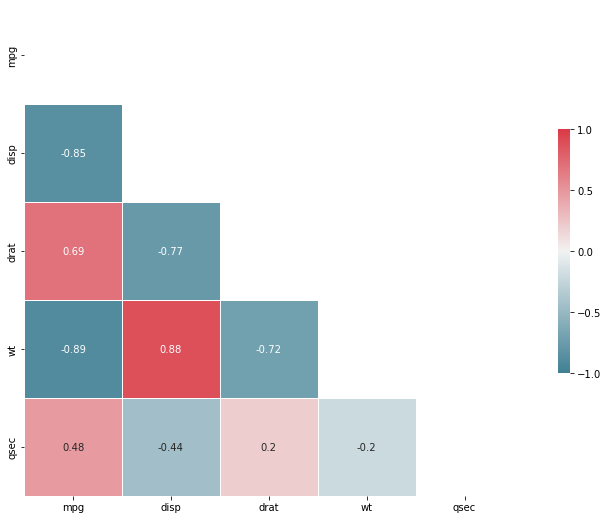

In [107]:
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
f, ax = plt.subplots(figsize=(16, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(corr_matrix, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
plt.savefig('Fig - Correlation matrix by means of the Pearson’s coefficient for all feature pairs.png')

# PCA - PCR

In [108]:
l,e = eig(corr_matrix)

In [109]:
print('Eigenvalues:', l)
print('Eigenvectors', e)

idx = l.argsort()[::-1]   
l = l[idx]
e = e[:,idx]

print('Sorted Eigenvalues:', l)
print('Sorted Eigenvectors', e)

Proportion_var_expl_PC1 = l[0] / sum(l)
Proportion_var_expl_PC2 = l[1] / sum(l)
Proportion_var_expl_PC3 = l[2] / sum(l)
Proportion_var_expl_PC4 = l[3] / sum(l)
Proportion_var_expl_PC5 = l[4] / sum(l)

print("Proportion of variance explained by PC1:", Proportion_var_expl_PC1)
print("Proportion of variance explained by PC2:", Proportion_var_expl_PC2)
print("Proportion of variance explained by PC3:", Proportion_var_expl_PC3)
print("Proportion of variance explained by PC4:", Proportion_var_expl_PC4)
print("Proportion of variance explained by PC5:", Proportion_var_expl_PC5)


Eigenvalues: [3.57502213 0.90319133 0.34248322 0.03956218 0.13974114]
Eigenvectors [[ 0.49962365 -0.05651629  0.3556206   0.50301317  0.60637765]
 [-0.50523671 -0.00788512 -0.00977744 -0.40843814  0.76010287]
 [ 0.43975155  0.28742339 -0.81290558 -0.10507618  0.22836348]
 [-0.48793631 -0.26556539 -0.43598817  0.70647377  0.04692869]
 [ 0.25228716 -0.91848057 -0.150124   -0.26459372  0.01405654]]
Sorted Eigenvalues: [3.57502213 0.90319133 0.34248322 0.13974114 0.03956218]
Sorted Eigenvectors [[ 0.49962365 -0.05651629  0.3556206   0.60637765  0.50301317]
 [-0.50523671 -0.00788512 -0.00977744  0.76010287 -0.40843814]
 [ 0.43975155  0.28742339 -0.81290558  0.22836348 -0.10507618]
 [-0.48793631 -0.26556539 -0.43598817  0.04692869  0.70647377]
 [ 0.25228716 -0.91848057 -0.150124    0.01405654 -0.26459372]]
Proportion of variance explained by PC1: 0.7150044259964243
Proportion of variance explained by PC2: 0.1806382665129772
Proportion of variance explained by PC3: 0.06849664454176849
Proport

In [110]:
print("Proportion of variance explained by PC1 + PC2:", Proportion_var_expl_PC1 + Proportion_var_expl_PC2)
print("Proportion of variance explained by PC1 + PC2 + PC3:", Proportion_var_expl_PC1 + Proportion_var_expl_PC2 + Proportion_var_expl_PC3)
print("Proportion of variance explained by PC1 + PC2 + PC3 + PC4:", Proportion_var_expl_PC1 + Proportion_var_expl_PC2 + Proportion_var_expl_PC3 + Proportion_var_expl_PC4)
print("Proportion of variance explained by PC1 + PC2 + PC3 + PC4 + PC5:", Proportion_var_expl_PC1 + Proportion_var_expl_PC2 + Proportion_var_expl_PC3 + Proportion_var_expl_PC4 + Proportion_var_expl_PC5)

Proportion of variance explained by PC1 + PC2: 0.8956426925094015
Proportion of variance explained by PC1 + PC2 + PC3: 0.96413933705117
Proportion of variance explained by PC1 + PC2 + PC3 + PC4: 0.992087564539554
Proportion of variance explained by PC1 + PC2 + PC3 + PC4 + PC5: 1.0


In [111]:
Corr_PC1_X1 = (e[0,0]*math.sqrt(l[0]))
Corr_PC1_X2 = (e[1,0]*math.sqrt(l[0]))
Corr_PC1_X3 = (e[2,0]*math.sqrt(l[0]))
Corr_PC1_X4 = (e[3,0]*math.sqrt(l[0]))
Corr_PC1_X5 = (e[4,0]*math.sqrt(l[0]))
Corr_PC2_X1 = (e[0,1]*math.sqrt(l[1]))
Corr_PC2_X2 = (e[1,1]*math.sqrt(l[1]))
Corr_PC2_X3 = (e[2,1]*math.sqrt(l[1]))
Corr_PC2_X4 = (e[3,1]*math.sqrt(l[1]))
Corr_PC2_X5 = (e[4,1]*math.sqrt(l[1]))

print("Correlation between PC1 and X1:", Corr_PC1_X1)
print("Correlation between PC1 and X2:", Corr_PC1_X2)
print("Correlation between PC1 and X3:", Corr_PC1_X3)
print("Correlation between PC1 and X4:", Corr_PC1_X4)
print("Correlation between PC1 and X5:", Corr_PC1_X5)
print("Correlation between PC2 and X1:", Corr_PC2_X1)
print("Correlation between PC2 and X2:", Corr_PC2_X2)
print("Correlation between PC2 and X3:", Corr_PC2_X3)
print("Correlation between PC2 and X4:", Corr_PC2_X4)
print("Correlation between PC2 and X5:", Corr_PC2_X5)

Correlation between PC1 and X1: 0.9446748476821857
Correlation between PC1 and X2: -0.9552878832498631
Correlation between PC1 and X3: 0.8314703015669771
Correlation between PC1 and X4: -0.9225767472693854
Correlation between PC1 and X5: 0.47701772007412674
Correlation between PC2 and X1: -0.05371103725993599
Correlation between PC2 and X2: -0.007493728393319957
Correlation between PC2 and X3: 0.2731567866220491
Correlation between PC2 and X4: -0.2523837294459244
Correlation between PC2 and X5: -0.8728906713382826


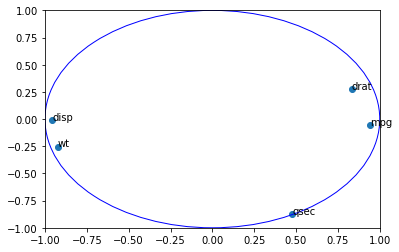

In [112]:
Corr_PC1 = [Corr_PC1_X1, Corr_PC1_X2, Corr_PC1_X3, Corr_PC1_X4, Corr_PC1_X5]
Corr_PC2 = [Corr_PC2_X1, Corr_PC2_X2, Corr_PC2_X3, Corr_PC2_X4, Corr_PC2_X5]

fig, ax = plt.subplots()
plt.scatter(Corr_PC1, Corr_PC2)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
cir = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_patch(cir)
annotations=["mpg", "disp", "drat", "wt", "qsec"]
for i in range(len(l)):
    plt.annotate(annotations[i], (Corr_PC1[i], Corr_PC2[i])) 
plt.show()

## By using Cross validation
We will get the same result

Text(0.5, 1.0, 'hp')

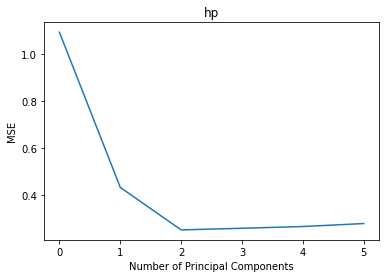

In [9]:
pca = PCA()
X_reduced = pca.fit_transform(X)


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# MSE 
score = -1*model_selection.cross_val_score(regr, np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')


In [125]:
pca = PCA(n_components = 2)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)[:,:1]

In [126]:
#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

0.5075127692953174

In [127]:
regr.score(X_reduced_test, y_test)

0.646827170905659

# PLS

## By using Cross Validation

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:93: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:325: RuntimeWarning: invalid value encountered in true_divide
  x_loadings = np.dot(x_scores, Xk) / np.dot(x_scores, x_scores)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cross_decomposition/_pls.py:334: RuntimeWarning: invalid value encountered in true_divide
  y_loadings = np.dot(x_scores, Yk) / np.dot(x_scores, x_scores)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, 

Text(0.5, 1.0, 'hp')

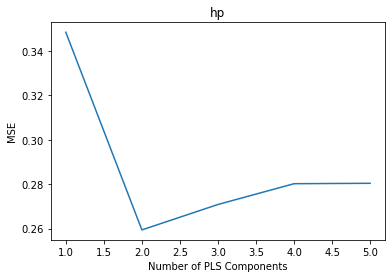

In [11]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE 
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, X, y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('hp')

In [12]:
#calculate RMSE
pls = PLSRegression(n_components=2)
pls.fit((X_train), y_train)
np.sqrt(mean_squared_error(y_test, pls.predict(X_test)))



0.2995851540838092

R squared 

In [130]:
pls.score(X_test, y_test)

0.8769351822284484